# <font color='black'>EE25737: Introduction to Machine Learning</font>
## <font color='black'>Fall 99-00, Group 2</font>

### [your name]
### [your student ID]

# C4: Neural Networks

## Requirements

For installing Pytorch, run the following code: (if you don't use Jupter Notebook, first you should install pip command)

In [ ]:
import sys
!{sys.executable} -m pip install torch


The following command must be run outside of the IPython shell:

    $ pip install torch

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


Tensorflow:

In [ ]:
pip install tensorflow

For installing Keras, first you should install Tensorflow:

In [ ]:
pip install keras


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Load data

In [29]:
import pandas as pd
import numpy as np

all_data = []

with open('/content/drive/My Drive/ML3/X_train.txt','r') as file:
    back_ns = file.read().split('\n')
    for row in back_ns[:-1]:
        all_data += [float(number) for number in row.split(' ')]

all_data = np.array(all_data).reshape([7767,561])
# all_data = list(all_data)
with open('/content/drive/My Drive/ML3/y_train.txt','r') as file:
    back_ns = file.read().split('\n')
    templist = []
    for i,row in enumerate(back_ns[:-1]):
        temp = list(all_data[i])
        temp.append(int(row)-1)
        templist += temp
    all_data = np.array(templist).reshape([7767,562])
np.random.shuffle(all_data)
length = len(all_data)


X_test = all_data[0:int(0.1 * length),:-1]
X_train = all_data[int(0.1 * length):,:-1]
Y_test = all_data[0:int(0.1 * length),-1]
Y_train = all_data[int(0.1 * length):,-1]





## Code for loading the data

## C4.1.

neural network for i =  10  done
neural network for i =  100  done
neural network for i =  200  done
neural network for i =  300  done
neural network for i =  400  done


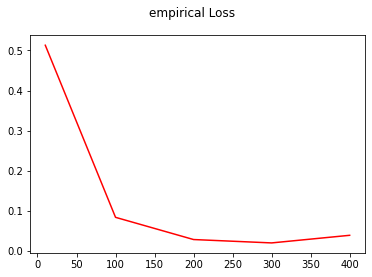

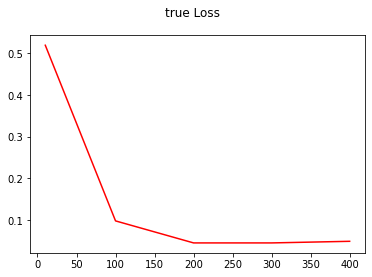

In [30]:
## Part 1.
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def create_neural_network_model(n,t,i,X,y,act = 'relu'):
    model = Sequential()
    model.add(Dense(n, input_shape=(561,),activation = act))
    for j in range(t-1):
        model.add(Dense(n,activation=act))
    model.add(Dense(12,activation='softmax'))
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.fit(X, y, epochs= i,verbose=0)
    # print(model.predict([X[100]]))
    # print(y[10])
    # print(y[100])
    return model

def loss_function(predictions,y):
  false_counts = 0
  for i in range(len(predictions)):
      if list(predictions[i]).index(max(predictions[i])) != y[i]:
          false_counts += 1
  return false_counts/len(y)

iterations = [10,100,200,300,400]
empirical_losses = []
test_losses = []
for i in iterations:
    model = create_neural_network_model(n = 8,t = 8,i = i,X=X_train,y = Y_train)
    empirical_losses.append(loss_function(model.predict(X_train),Y_train))
    test_losses.append(loss_function(model.predict(X_test),Y_test))
    print("neural network for i = ",i," done")

plt.plot(iterations,empirical_losses,color = 'r')
plt.suptitle('empirical Loss')
plt.show()

plt.plot(iterations,test_losses,color = 'r')
plt.suptitle('true Loss')
plt.show()






we observe that our empirical loss minimizes with 300 iterations but our true loss minimizes at i = 200. so it's safe to say with more than 200 iterations we might result in overfitting.


## C4.2.

neural network for n =  1  done
neural network for n =  2  done
neural network for n =  4  done
neural network for n =  8  done
neural network for n =  16  done
neural network for n =  32  done


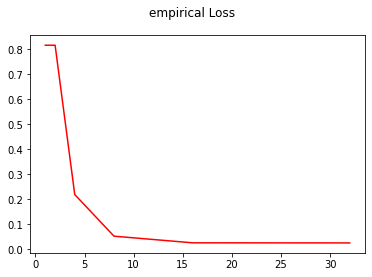

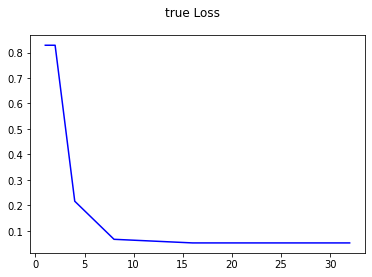

In [31]:
## Part 2.
ns = [1,2,4,8,16,32]
empirical_losses = []
test_losses = []
for n in ns:
    model = create_neural_network_model(n = n,t = 8,i = 100,X=X_train,y = Y_train)
    empirical_losses.append(loss_function(model.predict(X_train),Y_train))
    test_losses.append(loss_function(model.predict(X_test),Y_test))
    print("neural network for n = ",n," done")

plt.plot(ns,empirical_losses,color = 'r')
plt.suptitle('empirical Loss')
plt.show()
plt.plot(ns,test_losses,color = 'b')
plt.suptitle('true Loss')
plt.show()







we withness that both true loss and empirical loss minmize at n = 32. 

## C4.3.

neural network for t =  1  done
neural network for t =  2  done
neural network for t =  4  done
neural network for t =  8  done
neural network for t =  16  done


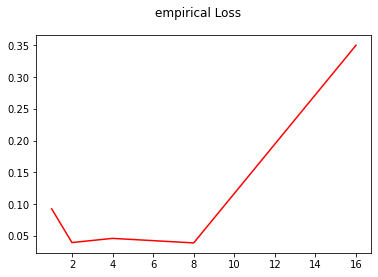

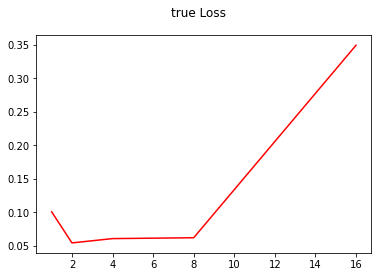

In [32]:
## Part 3.
ts = [1,2,4,8,16]
empirical_losses = []
test_losses = []
for t in ts:
    model = create_neural_network_model(n = 8,t = t,i = 100,X=X_train,y = Y_train)
    empirical_losses.append(loss_function(model.predict(X_train),Y_train))
    test_losses.append(loss_function(model.predict(X_test),Y_test))
    print("neural network for t = ",t," done")

plt.plot(ts,empirical_losses,color = 'r')
plt.suptitle('empirical Loss')
plt.show()

plt.plot(ts,test_losses,color = 'r')
plt.suptitle('true Loss')
plt.show()








we observe that our empirical loss minimizes with n = 8 but our true loss minimizes at n = 2. in both plots, increasing n will result in a greater error.
also from the closeness of the figures in all 3 sections we can conclude the the set of neural networks we have created has the uniform convergance property.

# C5. Multi-class Classification

## Load data

In [49]:
## code

import pandas as pd
import numpy as np
x = pd.read_csv('/content/drive/My Drive/ML3/fashion-mnist.csv')
all_data= x.to_numpy()
np.random.shuffle(all_data)
length = len(all_data)


X_test = all_data[0:int(0.5 * length),:-1]
X_train = all_data[int(0.5 * length):,:-1]
y_test = all_data[0:int(0.5 * length),-1]
y_train = all_data[int(0.5 * length):,-1]





## C5.1. SVM with linear kernel

In [43]:
## code
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
print("Accuracy of svm with linear kernel on train data is : ",svm_model_linear.score(X_train, y_train) )
print("Accuracy of svm with linear kernal on test data is : ",svm_model_linear.score(X_test, y_test)  )
print("confusion matrix of svm with linear kernel is : ")
print(confusion_matrix(y_test, svm_predictions) )






Accuracy of svm with linear kernel on train data is :  1.0
Accuracy of svm with linear kernal on test data is :  0.8064
confusion matrix of svm with linear kernel is : 
[[378   2   8  30   1   0  67   0   4   0]
 [  4 505   3   9   1   0   1   0   1   0]
 [ 18   5 365   9  53   1  55   0   6   0]
 [ 37  14   8 435  14   0  13   0   1   0]
 [  5   4 103  23 325   0  51   0   1   0]
 [  0   0   0   0   1 395   0  32   3  14]
 [ 94   3  69  10  48   0 255   0  10   0]
 [  0   0   0   0   0  30   0 446   1  25]
 [  5   0  10   8   3   5   8   0 454   2]
 [  0   0   0   0   0  14   0  21   0 474]]


## C5.2. SVM with gaussian kernel

In [69]:
## code
import math
import random
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 

#i commanded the initial part because it would take to much space in the output section
# but the best gamma captured from that is 3.189062924533182e-07 
#you can run the code to get sure
#in the initial part we analyze the interval 10e0-9 to 1000
# then by finding out thar 10e0-7 is the best answer, we take 10 samples from 10e0-7 to 10e-06 and find that 3.189062924533182e-07 gives the best accuracy
# best_test_accuracy = 0
# best_gamma = 0
# gamma = 0.0000000001
# for i in range(1,14):
#   gamma = gamma * 10
#   svm_model_gaussian = SVC(kernel = 'rbf', gamma = gamma).fit(X_train, y_train)
#   svm_predictions = svm_model_gaussian.predict(X_test) 
#   test_accuracy = svm_model_gaussian.score(X_test, y_test)
#   print("Accuracy of svm with gaussian kernel on train data with gamma = ",gamma," is : ",svm_model_gaussian.score(X_train, y_train) )
#   print("Accuracy of svm with gaussian kernal on test data with gamma = ",gamma," is : ",  test_accuracy)
#   print("confusion matrix of svm with gaussian kernel with gamma = ",gamma," is : ")
#   print(confusion_matrix(y_test, svm_predictions) )
#   print("-----------------------------------------------")
#   if test_accuracy > best_test_accuracy:
#     best_test_accuracy = test_accuracy
#     best_gamma = gamma
# print("********************************************")
# print("based on the initial test results, the best gamma is: ",best_gamma," with test error = ",best_test_accuracy)
# print("so we will sample between ",best_gamma," & ",best_gamma * 10)
# candidates = [] 
# while len(candidates) < 10:
#   candidate = random.uniform(best_gamma, best_gamma * 10)
#   if candidate not in candidates:
#     candidates.append(candidate)

# best_test_accuracy = 0
# best_gamma = 0
# best_model = ''
# for candidate in candidates:
#   gamma = candidate
#   svm_model_gaussian = SVC(kernel = 'rbf', gamma = gamma).fit(X_train, y_train)
#   svm_predictions = svm_model_gaussian.predict(X_test) 
#   test_accuracy = svm_model_gaussian.score(X_test, y_test)
#   print("Accuracy of svm with gaussian kernel on train data with gamma = ",gamma," is : ",svm_model_gaussian.score(X_train, y_train) )
#   print("Accuracy of svm with gaussian kernal on test data with gamma = ",gamma," is : ",  test_accuracy)
#   print("confusion matrix of svm with gaussian kernel with gamma = ",gamma," is : ")
#   print(confusion_matrix(y_test, svm_predictions) )
#   print("-----------------------------------------------")
#   if test_accuracy > best_test_accuracy:
#     best_test_accuracy = test_accuracy
#     best_gamma = gamma
#     best_model = svm_model_gaussian

best_gamma = 3.189062924533182 * (10 ** -7)
svm_model_gaussian = SVC(kernel = 'rbf', gamma = best_gamma).fit(X_train, y_train)
svm_predictions = svm_model_gaussian.predict(X_test) 
best_accuracy = svm_model_gaussian.score(X_test, y_test)

print("********************************************")
print("based on the  test results, the best gamma is: ",best_gamma," with test error = ",best_test_accuracy)
print("confusion matrix of svm with gaussian kernel with gamma = ",best_gamma," is : ")
print(confusion_matrix(y_test, svm_predictions) )







********************************************
based on the  test results, the best gamma is:  3.1890629245331815e-07  with test error =  0.8674
confusion matrix of svm with gaussian kernel with gamma =  3.1890629245331815e-07  is : 
[[432   0   8  22   1   0  48   0   9   0]
 [  2 448   2  21   0   0   0   0   1   0]
 [  6   0 409   7  40   0  27   0  10   0]
 [ 27   0   2 478  20   0   6   0   1   0]
 [  1   0  50  11 403   0  42   0   0   0]
 [  0   0   0   0   0 432   0  13   4  13]
 [ 72   1  44  12  48   0 300   0   5   0]
 [  0   0   0   0   0   8   0 485   0  36]
 [  0   0   5   1   2   2   9   0 459   1]
 [  0   0   0   0   0   3   0  20   0 491]]


## C5.3. K-nearest neighbor

In [55]:
## code
from sklearn.neighbors import KNeighborsClassifier
import math
best_accuracy = 0
best_k = 1
#initial_search
for k in range(1,201,50): # wee choose intervals between 1 and 2 * square(number of samples) to find the best answer
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  test_accuracy = neigh.score(X_test, y_test)
  knn_predictions = neigh.predict(X_test)
  print("Accuracy of knn  on train data with k = ",k," is : ",neigh.score(X_train, y_train) )
  print("Accuracy of knn  on test data with k = ",k," is : ",  test_accuracy)
  print("confusion matrix of knn with k = ",k," is : ",)
  print(confusion_matrix(y_test, knn_predictions) )
  print("-----------------------------------------")
  if test_accuracy > best_error:
    best_k = k
    best_accuracy = test_accuracy

print("best k in initial search was k = ",best_k)
print("so we will search the interval between ",best_k," & ",best_k+10)
final_accuracy = 0
final_k = best_k
#final_search
final_model = ''
for k in range(best_k,best_k+10,1):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  test_accuracy = neigh.score(X_test, y_test)
  if test_accuracy > final_accuracy:
    final_k = k
    final_accuracy = test_accuracy
    final_model = neigh

print("----------------------output--------------------------")
print("best model is with k = ",final_k," test accuracy = ",final_accuracy)
print("confusion matrix of knn with k = ",final_k," is : ",)
print(confusion_matrix(y_test, final_model.predict(X_test)) )










Accuracy of knn  on train data with k =  1  is :  1.0
Accuracy of knn  on test data with k =  1  is :  0.7948
confusion matrix of knn with k =  1  is : 
[[401   0  12   9   3   0  89   0   6   0]
 [  4 455   1  10   1   0   2   0   1   0]
 [  9   0 321   8  77   0  82   0   2   0]
 [ 31   7   5 434  33   0  23   0   1   0]
 [  2   0  84  15 329   0  77   0   0   0]
 [  0   0   0   0   0 367   1  49   6  39]
 [ 87   1  60  12  49   0 269   0   4   0]
 [  0   0   0   0   0   2   0 469   0  58]
 [  2   0   8   4   9   2  11   1 441   1]
 [  0   0   0   0   0   2   0  24   0 488]]
-----------------------------------------
Accuracy of knn  on train data with k =  51  is :  0.7778
Accuracy of knn  on test data with k =  51  is :  0.7788
confusion matrix of knn with k =  51  is : 
[[422   0  19  34   4   0  36   0   5   0]
 [  7 436   5  19   2   0   4   0   1   0]
 [  6   0 337   5  71   0  77   0   3   0]
 [ 41   4   3 438  29   0  18   0   1   0]
 [  2   3  62  24 352   0  64   0   0   0]


## C5.4. Decision trees

In [57]:
## code
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier().fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
print("Accuracy of decision tree  on train data is : ",dtree_model.score(X_train, y_train) )
print("Accuracy of decision tree  on test data is : ",  dtree_model.score(X_test, y_test))
print("confusion matrix of desicion tree is : ")
print(confusion_matrix(y_test, dtree_predictions) )





Accuracy of decision tree  on train data is :  1.0
Accuracy of decision tree  on test data is :  0.7336
confusion matrix of desicion tree is : 
[[356   5  19  30   7   3  88   0  11   1]
 [  6 429   3  24   2   1   7   2   0   0]
 [ 12   1 286  18  88   0  83   0  11   0]
 [ 41  18   6 404  26   4  27   0   7   1]
 [  3   3  87  28 312   0  62   1  11   0]
 [  1   3   1   1   1 380   2  41  16  16]
 [ 76   2  64  23  72   2 230   0  13   0]
 [  0   0   0   0   0  37   0 428   3  61]
 [  8   4   9   3  15  12  10   8 403   7]
 [  0   0   0   1   3  17   1  44   8 440]]


we witness that the decision tree provides a somewhat mediocre result compared to other sections.

## C5.5. Neural network

157/157 [==============================] - 0s 3ms/step - loss: 2.3048 - accuracy: 0.0958
accuaracy of neural network on train data with activation function  relu  is :  0.10679999738931656
accuaracy of neural network on test data with activation function  relu  is :  0.0957999974489212
confusion matrix of neural network with activation function  relu  is :
[[  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0 474   0]
 [  0   0   0   0   0   0   0   0 499   0]
 [  0   0   0   0   0   0   0   0 534   0]
 [  0   0   0   0   0   0   0   0 507   0]
 [  0   0   0   0   0   0   0   0 462   0]
 [  0   0   0   0   0   0   0   0 482   0]
 [  0   0   0   0   0   0   0   0 529   0]
 [  0   0   0   0   0   0   0   0 479   0]
 [  0   0   0   0   0   0   0   0 514   0]]
--------------------------------------------------
157/157 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.7670
accuaracy of neural network on train data with activation function  si

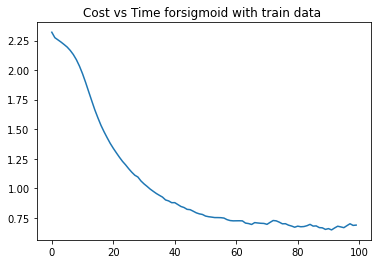

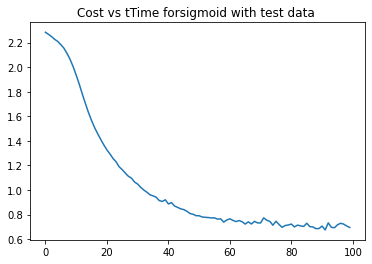

In [66]:
## code
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
def create_neural_network_model(n,t,i,X_train,y_train,X_test,y_test,act = 'relu'):
  model = Sequential()
  model.add(Dense(n, input_shape=(784,),activation = act))
  for j in range(t-1):
      model.add(Dense(n,activation=act))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
  history = model.fit(X_train, to_categorical(y_train), epochs= i,verbose=0,validation_data = (X_test,to_categorical(y_test)))
  # print(model.predict([X[100]]))
  # print(y[10])
  # print(y[100])
  return model,history

models = {}
histories = {}
acts = ['relu', 'sigmoid', 'softmax', 'tanh', 'exponential']
for act in acts:
  model,history = create_neural_network_model(n = 100,t = 3,i = 100,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test,act = act)
  models[act] = model
  histories[act] = history


best_accuracy = 0
best_act = ''
for act in acts:
  loss1,accuracy_train = models[act].evaluate(X_train, to_categorical(y_train))
  loss,accuracy = models[act].evaluate(X_test, to_categorical(y_test))
  print("accuaracy of neural network on train data with activation function ",act," is : ",accuracy_train )
  print("accuaracy of neural network on test data with activation function ",act," is : ",accuracy )
  print("confusion matrix of neural network with activation function ",act," is :")
  predictions = np.argmax(models[act].predict(X_test), axis = 1)
  print(confusion_matrix(y_test, predictions) )
  print("--------------------------------------------------")

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_act = act
  
print("based on the results, the best activation function is ",best_act," with ",best_accuracy," test accuracy")
print("confusion matrix of neural network with activation function ",best_act," is :")
predictions = np.argmax(models[best_act].predict(X_test), axis = 1)
print(confusion_matrix(y_test, predictions) )



#plotting cost vs time
plt.title('Cost vs Time for' + best_act + ' with train data ')
plt.plot(histories[best_act].history['loss'])
plt.show()
plt.title('Cost vs Time for' + best_act + ' with test data ')
plt.plot(histories[best_act].history['val_loss'] )
plt.show()


  






# C6. K-means

## Load data

In [14]:
import pandas as pd
import numpy as np
x = pd.read_csv('/content/drive/My Drive/ML3/iris.csv')
label_to_numbers = {'Setosa':0,'Virginica':2,'Versicolor':1}
real_labels = np.array([label_to_numbers[label] for label in x['variety'].to_numpy()])
x.pop('variety')
vectors = x.to_numpy()
features = x.columns







2


## C6.1. Algorithm

In [15]:
import math
def k_means(matrix, k, max_iterations=100):
  # matrix = np.array(matrix)
  centroid_indexes = []
  #initial centroids
  while len(centroid_indexes) < k:
    centroid = np.random.randint(0,len(matrix))
    if centroid not in centroid_indexes:
        centroid_indexes.append(centroid)
  centroids = []
  for index in centroid_indexes:
      centroids.append(matrix[index])
  labels = np.zeros([len(matrix)])
  labels_changed = True
  iteration = 0
  while labels_changed and iteration < max_iterations:
    labels_changed = False
    iteration += 1
    cluster_members = [set() for dummy in range(k)]
    for i,vector in enumerate(matrix):
      min_distance = math.inf
      min_index = 0
      for c,centroid in enumerate(centroids):
        temp_distance = np.linalg.norm(vector-centroid)
        if temp_distance < min_distance:
          min_distance = temp_distance
          min_index = c
      if min_index != labels[i]:
        labels_changed = True
        labels[i] = min_index
      cluster_members[min_index].add(i)
    if labels_changed:
      for c in range(k):
        new_centroid = np.zeros([len(matrix[0])],dtype=float)
        for vector_index in cluster_members[c]:
          new_centroid += matrix[vector_index]
        new_centroid = new_centroid/len(cluster_members[c])
        centroids[c] = new_centroid
  clusters = labels
  return clusters

## C6.2. Plot clusters in 2d

kmeans clustering done!


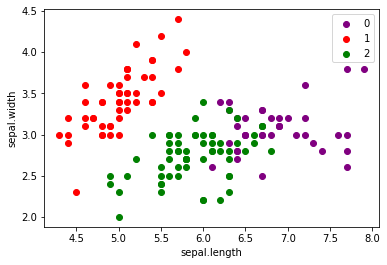

***************************************


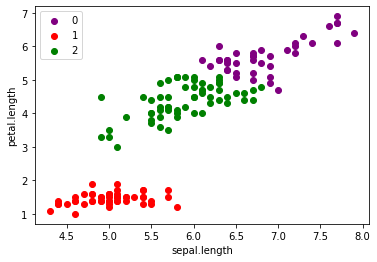

***************************************


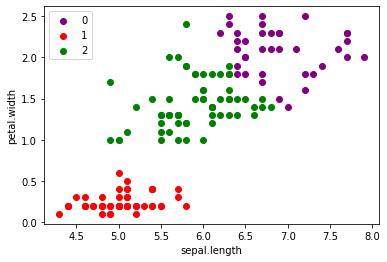

***************************************


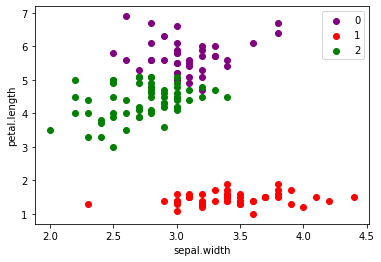

***************************************


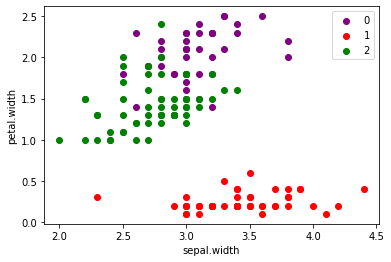

***************************************


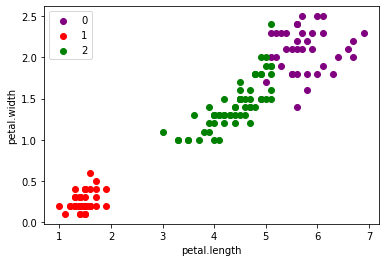

***************************************


In [27]:
import matplotlib.pyplot as plt
clusters = k_means(vectors,3)
print('kmeans clustering done!')

cdict = {0:'purple',1:'red',2:'green'}
for i in range(4):
  for j in range(i+1,4):
    fig, ax = plt.subplots()
    for label in range(3):
      ix = np.where(clusters == label)
      ax.scatter(vectors[ix,i], vectors[ix,j], c = cdict[label], label = label)
    ax.set_ylabel(features[j])
    ax.set_xlabel(features[i])
    ax.legend()
    plt.show()
    print("***************************************")
  


## C6.3. Redundant feature

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
ARI = adjusted_rand_score(clusters,real_labels)
print("Adjusted Rand index when all 4 features are used" ,ARI)
for i in range(4):
  indexes = [j for j in range(4) if j != i]
  new_vectors = []
  for vector in vectors:
    new_vectors.append(vector[indexes])
  new_vectors = np.array(new_vectors)
  new_clusters = k_means(new_vectors,3)
  ARI = adjusted_rand_score(new_clusters,real_labels)
  print("Adjusted Rand index when ",features[i]," is missing is: " ,ARI)


Adjusted Rand index when all 4 features are used 0.7163421126838475
Adjusted Rand index when  sepal.length  is missing is:  0.44114724987656645
Adjusted Rand index when  sepal.width  is missing is:  0.7576057289555466
Adjusted Rand index when  petal.length  is missing is:  0.6103971645085184
Adjusted Rand index when  petal.width  is missing is:  0.7028455614106202


As it can be withnessed we have the best accuracy when the feature "sepal.width" is missing.
but on the other hand, our original accuracy changes the least when petal.width is missing.